In [58]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review

In [74]:
boston = Table.read_table('boston.csv')
boston.show(5)

sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235
218,1189,7,42.5588


In [69]:
np.median(boston.column('ride time'))

15.501916666666666

Refer to the picture in the slides from here!

In [79]:
def observed_sample_median(table, col_label, sample_size):
    return np.median(table.sample(sample_size).column(col_label))

In [78]:
def observed_sample_median_distribution(table, col_label, repetition_size, sample_size):

    observed_sample_medians = make_array()

    for rep in np.arange(repetition_size):
        new_median = observed_sample_median(table, col_label, sample_size)
        observed_sample_medians = np.append(observed_sample_medians, new_median)

    return observed_sample_medians

______

## New material

### The case of Robert Swain

In [21]:
population_proportions = make_array(.26, .74)
population_proportions

array([ 0.26,  0.74])

In [22]:
sample_proportions(100, population_proportions)

array([ 0.31,  0.69])

In [23]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [24]:
panel_proportion()

0.3

In [25]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

In [26]:
panels

array([ 27.,  29.,  22., ...,  23.,  26.,  25.])

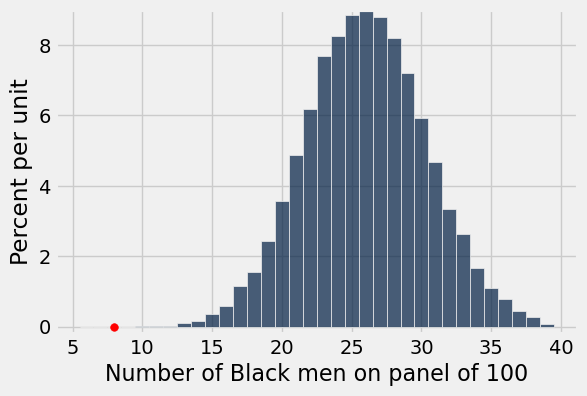

In [110]:
Table().with_column(
    'Number of Black men on panel of 100', panels
).hist(bins=np.arange(5.5,40.))

# Plotting details; ignore this code
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

_____

### Mendel's pea plant model

In [90]:
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [91]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([ 0.7459634,  0.2540366])

In [92]:
def purple_flowers():
    return abs(sample_proportions(929, predicted_proportions).item(0) - 0.75)

In [93]:
purple_flowers()

0.008880516684607098

In [101]:
purples_differences = make_array()

for i in np.arange(10000):
    new_purple_difference = purple_flowers()
    purples_differences = np.append(purples_differences, new_purple_difference)

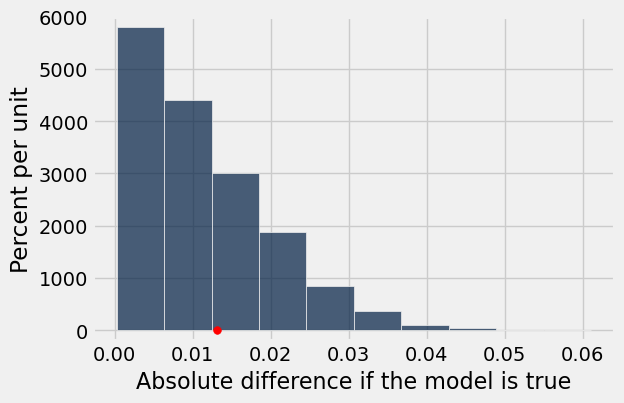

In [109]:
Table().with_column('Absolute difference if the model is true', purples_differences).hist()

# Plotting details; ignore this code
plots.ylim(-0.02*100, 0.6*100)
plots.scatter(abs(observed_purples -0.75), 0, color='red', s=30);

## Appendix: empirical distributions review with the `united` dataset.

In [3]:
united = Table.read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [6]:
np.median(united.column('Delay'))

2.0

In [7]:
def observed_sample_median(sample_size):
    return np.median(united.sample(sample_size).column('Delay'))

In [8]:
def observed_sample_median_distribution(repetition_size, sample_size):

    observed_sample_medians = make_array()

    for rep in np.arange(repetition_size):
        new_median = observed_sample_median(sample_size)
        observed_sample_medians = np.append(observed_sample_medians, new_median)

    return observed_sample_medians

In [16]:
size_10 = observed_sample_median_distribution(1000,10)
size_100 = observed_sample_median_distribution(1000,100)
size_1000 = observed_sample_median_distribution(1000,1000)

In [19]:
sample_median_table = Table().with_columns('Size 10', size_10,
                                           'Size 100', size_100,
                                           'Size 1000', size_1000)

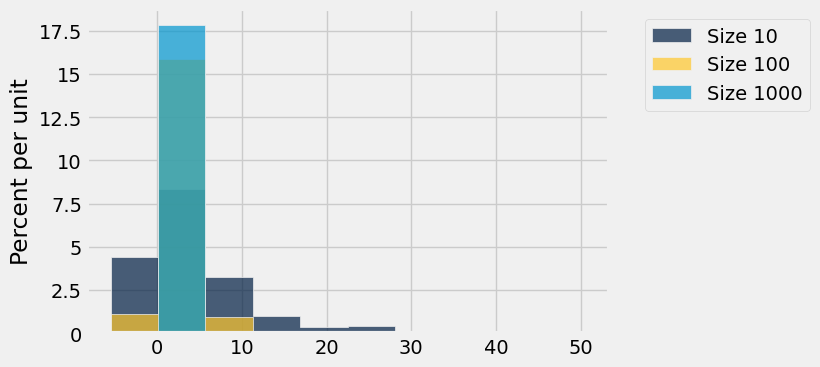

In [20]:
sample_median_table.hist()

______